Dataset ini berisikan jumlah sepeda sewaan per jam dan harian diantara tahun 2011 dan 2012 di dalam Capital bike share system dengan informasi cuaca dan musiman yang sesuai. Capital bike share system sendiri adalah dimana proses berlangganan, menyewa dan pengembalian menjadi proses yang otomatis. Melalui sistem ini, penggunanya dengan mudahnya bisa menyewa sepeda dari suatu tempat dan mengembalikannya di tempat yang lain.

In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Gathering Data

In [17]:
#gabungkan kedua dataset menjadi 1 dataframe
dataset1 = pd.read_csv('day.csv')
dataset2 = pd.read_csv('hour.csv')

df = pd.concat([dataset1,dataset2])
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000
mean,8354.006405,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033,11.546752
std,5180.771860,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954,6.914405
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3797.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000,6.000000
50%,8324.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000,12.000000
75%,12851.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000,18.000000
max,17379.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000,23.000000


Assessing Data

In [18]:
#Mencari tahu informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.5+ MB


In [19]:
#Mencari Missing Value
df.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

instant : indeks rekaman

dteday : tanggal

season : musim (1 : semi, 2 : panas, 3 : gugur, 4 : dingin)

yr : tahun (0:2011, 1:2012)

mnth : bulan (1 s.d. 12)

hr : jam (0 s.d. 23)

holiday : hari tsb. libur atau tidak

weekday : hari di minggu tsb.

workingday : akhir pekan / libur : 0, selain itu 1

weathersit : 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : suhu celcius (dinormalisasi)

atemp : suhu perasaan dalam celcius (dinormalisasi)

hum : kelembapan (dinormalisasi)

windspeed : kecepatan udara (dinormalisasi)

casual : jumlah pengguna biasa

registered : jumlah pengguna teregistrasi

cnt : jumlah sepeda sewaan termasuk casual dan registered


In [21]:
#Mencari Duplicate Value
duplicates = {}

for column in df.columns:
    duplicates[column] = df.duplicated(subset=[column]).sum()

# Print the number of duplicates in each column
for column, n_duplicates in duplicates.items():
    print(f'{column}: {n_duplicates} duplicates')

instant: 731 duplicates
dteday: 17379 duplicates
season: 18106 duplicates
yr: 18108 duplicates
mnth: 18098 duplicates
holiday: 18108 duplicates
weekday: 18103 duplicates
workingday: 18108 duplicates
weathersit: 18106 duplicates
temp: 17582 duplicates
atemp: 17358 duplicates
hum: 17459 duplicates
windspeed: 17431 duplicates
casual: 17327 duplicates
registered: 16670 duplicates
cnt: 16558 duplicates
hr: 18085 duplicates


In [22]:
#Mencari outlier
outliers = {}
for column in df.columns:
    if df[column].dtype.kind in 'biufc':  # Check if the column is numeric
        Q1 = df[column].quantile(0.25)  # First quartile (Q1)
        Q3 = df[column].quantile(0.75)  # Third quartile (Q3)
        IQR = Q3 - Q1  # Interquartile range (IQR)
        # Define the range for non-outlier values
        non_outlier_range = (df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)
        # Count the number of outliers and add to the dictionary
        outliers[column] = len(df[column]) - non_outlier_range.sum()

# Print the number of outliers in each column
for column, n_outliers in outliers.items():
    print(f'{column}: {n_outliers} outliers')


instant: 0 outliers
season: 0 outliers
yr: 0 outliers
mnth: 0 outliers
holiday: 521 outliers
weekday: 0 outliers
workingday: 0 outliers
weathersit: 3 outliers
temp: 0 outliers
atemp: 0 outliers
hum: 23 outliers
windspeed: 343 outliers
casual: 1602 outliers
registered: 1254 outliers
cnt: 1047 outliers
hr: 731 outliers


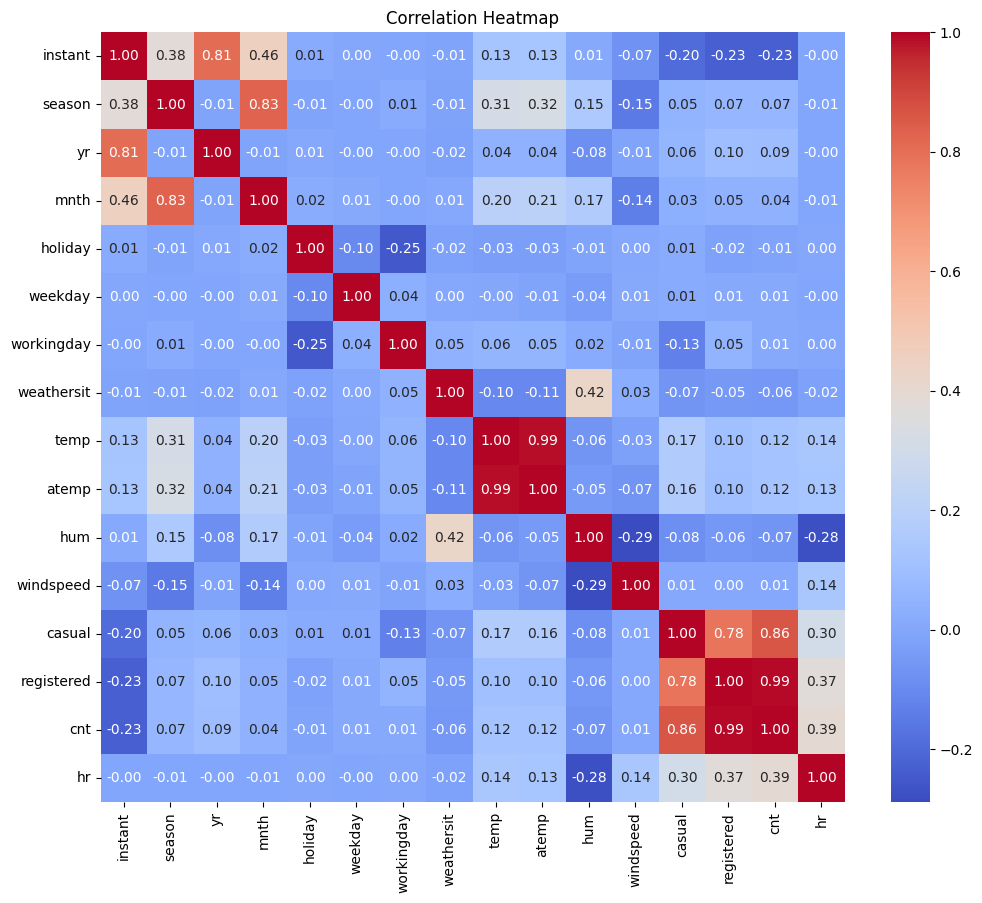

In [23]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for the numeric columns
corr = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Cleaning Data

In [ ]:
#Menghilangkan beberapa fitur yang memiliki nilai korelasi rendah
df = df.drop('instant', axis=1)